In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [37]:
data = pd.read_csv(r"C:\Users\yasin\OneDrive\Desktop\intrn_corizo\Project 1 - Cardiovascular Disease Prediction using Machine Learing\github\cardio_train.csv", delimiter=';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [38]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

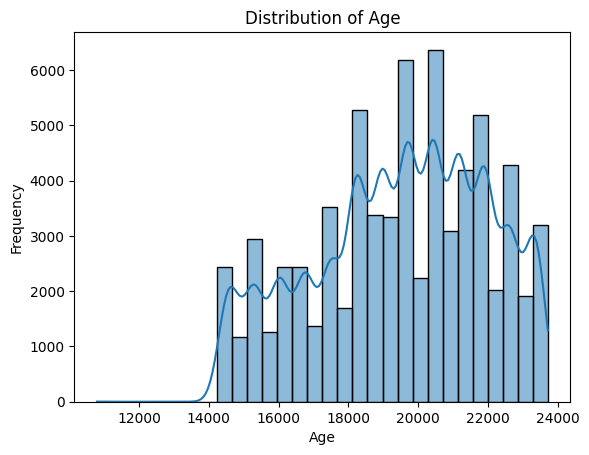

In [39]:
sns.histplot(data['age'], bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

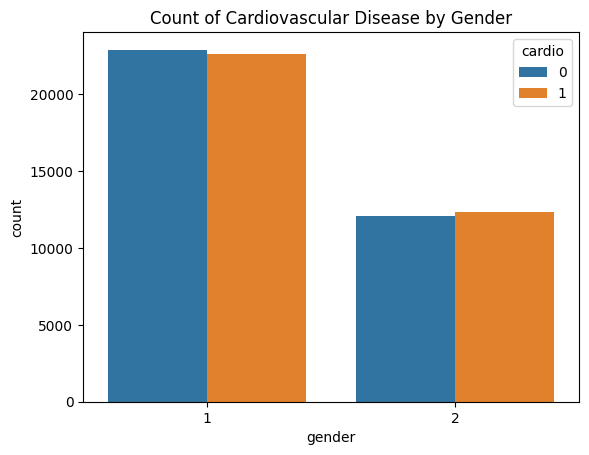

In [40]:
sns.countplot(x='gender', hue='cardio', data=data)
plt.title('Count of Cardiovascular Disease by Gender')
plt.show()

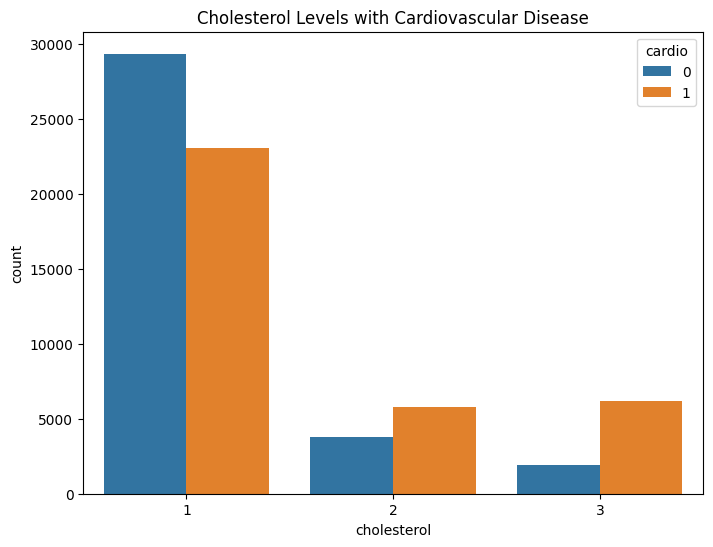

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='cholesterol', hue='cardio', data=data)
plt.title('Cholesterol Levels with Cardiovascular Disease')
plt.show()

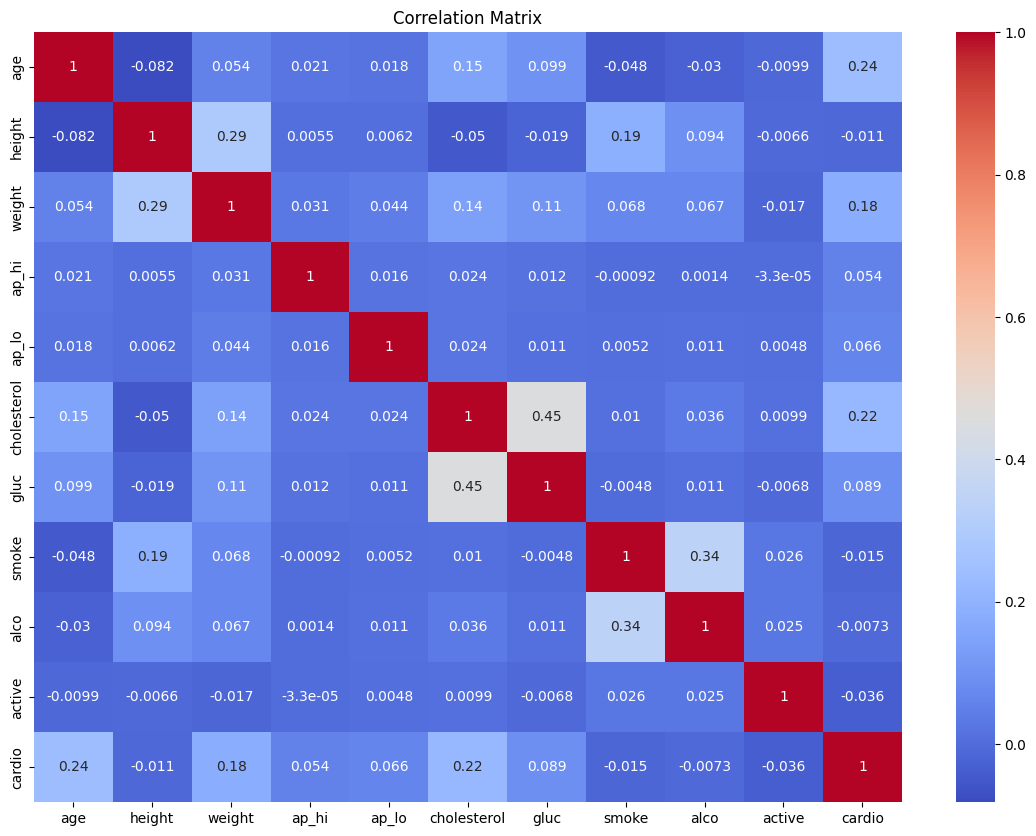

In [42]:
features_for_correlation = data.iloc[:, [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
plt.figure(figsize=(14, 10))
sns.heatmap(features_for_correlation.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
X = data.drop('cardio', axis=1)
y = data['cardio']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
predictions = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 72.71%


In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

c:\Users\yasin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
print(f'Logistic Regression Accuracy: {lr_accuracy:.2%}')

Logistic Regression Accuracy: 69.88%


In [50]:
from sklearn.tree import DecisionTreeClassifier 

In [51]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)

In [52]:
print(f'Decision Tree Accuracy: {dt_accuracy:.2%}')

Decision Tree Accuracy: 63.54%


In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [55]:
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy:.2%}')

K-Nearest Neighbors Accuracy: 55.41%


In [56]:
from sklearn.svm import SVC

In [57]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [ ]:
print(f'Support Vector Machines Accuracy: {svm_accuracy:.2%}')